In [1]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range
import time

from common import *

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import logging

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
with open('SVHN_train.pickle', 'rb') as f:
    tmp_save = pickle.load(f)
    train_dataset_56 = tmp_save['dataset']
    train_labels = tmp_save['labels']
    
valid_size = 2000
valid_dataset_56 = train_dataset_56[:valid_size]
valid_labels = train_labels[:valid_size]
train_dataset_56 = train_dataset_56[valid_size:]
train_labels = train_labels[valid_size:]

with open('SVHN_test.pickle', 'rb') as f:
    tmp_save = pickle.load(f)
    test_dataset_56 = tmp_save['dataset']
    test_labels = tmp_save['labels']
    
print('Training set', train_dataset_56.shape, train_labels.shape)
print('Validation set', valid_dataset_56.shape, valid_labels.shape)
print('Test set', test_dataset_56.shape, test_labels.shape)   

Training set (31402, 56, 56) (31402,)
Validation set (2000, 56, 56) (2000,)
Test set (13068, 56, 56) (13068,)


In [5]:
num_digits = 3

train_dataset_56, train_labels = max_digits(train_dataset_56, train_labels, num_digits)
valid_dataset_56, valid_labels = max_digits(valid_dataset_56, valid_labels, num_digits)
test_dataset_56, test_labels = max_digits(test_dataset_56, test_labels, num_digits)
print('Training set', train_dataset_56.shape, train_labels.shape)
print('Validation set', valid_dataset_56.shape, valid_labels.shape)
print('Test set', test_dataset_56.shape, test_labels.shape) 

Training set (30041, 56, 56) (30041,)
Validation set (1917, 56, 56) (1917,)
Test set (12920, 56, 56) (12920,)


Labels [3]
Dtype float32
Shape (56, 56)
Color range -0.500154 0.5


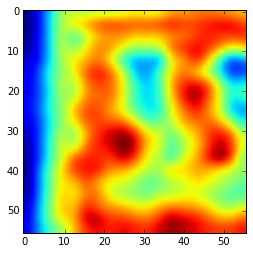

Labels [2 5 1]
Dtype float32
Shape (56, 56)
Color range -0.518299 0.5


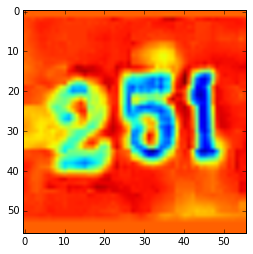

Labels [4]
Dtype float32
Shape (56, 56)
Color range -0.497002 0.5


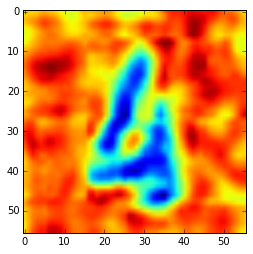

Labels [4 9]
Dtype float32
Shape (56, 56)
Color range -0.487074 0.5


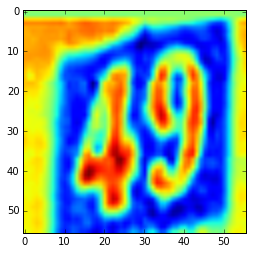

Labels [5]
Dtype float32
Shape (56, 56)
Color range -0.549719 0.5


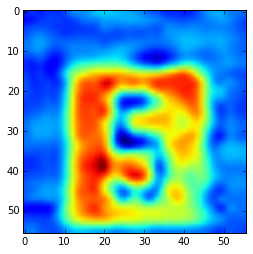

Labels [5]
Dtype float32
Shape (56, 56)
Color range -0.513124 0.5


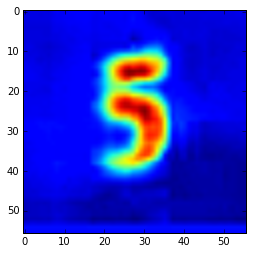

In [6]:
for dataset, labels in [(train_dataset_56, train_labels),
                        (valid_dataset_56, valid_labels),
                        (test_dataset_56, test_labels)]:
    show_images(dataset, labels, 2)

In [7]:
num_labels = 11 # Add an extra character so we can deal with spaces
num_channels = 1 # grayscale

train_dataset_56, train_labels = reformat(num_digits, num_labels, train_dataset_56, train_labels)
valid_dataset_56, valid_labels = reformat(num_digits, num_labels, valid_dataset_56, valid_labels)
test_dataset_56, test_labels = reformat(num_digits, num_labels, test_dataset_56, test_labels)

print('Training set', train_dataset_56.shape, train_labels.shape)
print('Validation set', valid_dataset_56.shape, valid_labels.shape)
print('Test set', test_dataset_56.shape, test_labels.shape)

Training set (30041, 56, 56, 1) (30041, 3, 11)
Validation set (1917, 56, 56, 1) (1917, 3, 11)
Test set (12920, 56, 56, 1) (12920, 3, 11)


In [8]:
test_dataset_56 = test_dataset_56[:6000]
test_labels = test_labels[:6000]

train_dataset_28 = train_dataset_56[:, ::2, ::2, :]
valid_dataset_28 = valid_dataset_56[:, ::2, ::2, :]
test_dataset_28 = test_dataset_56[:, ::2, ::2, :]
print('Training set', train_dataset_28.shape, train_labels.shape)
print('Validation set', valid_dataset_28.shape, valid_labels.shape)
print('Test set', test_dataset_28.shape, test_labels.shape)

Training set (30041, 28, 28, 1) (30041, 3, 11)
Validation set (1917, 28, 28, 1) (1917, 3, 11)
Test set (6000, 28, 28, 1) (6000, 3, 11)


In [9]:
dataset_56 = (train_dataset_56, valid_dataset_56, test_dataset_56)
dataset_28 = (train_dataset_28, valid_dataset_28, test_dataset_28)

In [10]:
train_dataset, valid_dataset, test_dataset = dataset_28

def run(graph_config):
    graph = create_graph(num_digits, num_labels, valid_dataset, test_dataset, **graph_config) 
    run_graph(graph, num_digits, train_dataset, train_labels, valid_labels, test_labels)
    return graph

In [11]:
graph = run({})

Initialized
Elapsed time(s):13/60 (0.23%)
Learning rate: 0.0498705
Minibatch loss at step 500: 1.917215
Minibatch accuracy: 31.2%
Validation accuracy: 41.8%
Elapsed time(s):28/60 (0.47%)
Learning rate: 0.0497417
Minibatch loss at step 1000: 1.831551
Minibatch accuracy: 35.4%
Validation accuracy: 44.4%
Elapsed time(s):42/60 (0.72%)
Learning rate: 0.0496131
Minibatch loss at step 1500: 1.491790
Minibatch accuracy: 56.2%
Validation accuracy: 48.4%
Elapsed time(s):58/60 (0.97%)
Learning rate: 0.0494849
Minibatch loss at step 2000: 1.458765
Minibatch accuracy: 64.6%
Validation accuracy: 52.0%
Elapsed time(s):60/60 (1.01%)

TIMEUP!
Learning rate: 0.0494846
Minibatch loss at step 2001: 1.795279
Minibatch accuracy: 52.1%
Validation accuracy: 52.3%
Test accuracy: 55.5%
Creating outputs
Finished


In [12]:
graph = run({'use_dropout':True})

Initialized
Elapsed time(s):13/60 (0.22%)
Learning rate: 0.0498705
Minibatch loss at step 500: 1.921912
Minibatch accuracy: 29.2%
Validation accuracy: 40.5%
Elapsed time(s):28/60 (0.48%)
Learning rate: 0.0497417
Minibatch loss at step 1000: 1.801947
Minibatch accuracy: 47.9%
Validation accuracy: 43.2%
Elapsed time(s):43/60 (0.72%)
Learning rate: 0.0496131
Minibatch loss at step 1500: 1.506289
Minibatch accuracy: 56.2%
Validation accuracy: 48.3%
Elapsed time(s):57/60 (0.96%)
Learning rate: 0.0494849
Minibatch loss at step 2000: 1.429828
Minibatch accuracy: 56.2%
Validation accuracy: 52.2%
Elapsed time(s):60/60 (1.01%)

TIMEUP!
Learning rate: 0.0494846
Minibatch loss at step 2001: 1.822307
Minibatch accuracy: 54.2%
Validation accuracy: 52.9%
Test accuracy: 56.0%
Creating outputs
Finished


In [13]:
graph = run({'use_dropout':True,
             'learning_rate':0.5})

Initialized
Elapsed time(s):12/60 (0.21%)
Learning rate: 0.498705
Minibatch loss at step 500: 1.681189
Minibatch accuracy: 64.6%
Validation accuracy: 48.4%
Elapsed time(s):28/60 (0.48%)
Learning rate: 0.497417
Minibatch loss at step 1000: 1.530564
Minibatch accuracy: 72.9%
Validation accuracy: 55.0%
Elapsed time(s):44/60 (0.75%)
Learning rate: 0.496131
Minibatch loss at step 1500: 1.269799
Minibatch accuracy: 83.3%
Validation accuracy: 59.6%
Elapsed time(s):60/60 (1.00%)

TIMEUP!
Learning rate: 0.494944
Minibatch loss at step 1963: 1.191669
Minibatch accuracy: 81.2%
Validation accuracy: 63.3%
Test accuracy: 64.8%
Creating outputs
Finished


In [14]:
graph = run({'use_dropout':True,
             'learning_decay':0.2})

Initialized
Elapsed time(s):12/60 (0.21%)
Learning rate: 0.0495985
Minibatch loss at step 500: 1.992841
Minibatch accuracy: 20.8%
Validation accuracy: 40.9%
Elapsed time(s):28/60 (0.48%)
Learning rate: 0.0492009
Minibatch loss at step 1000: 1.868546
Minibatch accuracy: 33.3%
Validation accuracy: 43.6%
Elapsed time(s):43/60 (0.72%)
Learning rate: 0.0488066
Minibatch loss at step 1500: 1.520136
Minibatch accuracy: 60.4%
Validation accuracy: 46.3%
Elapsed time(s):58/60 (0.97%)
Learning rate: 0.0484154
Minibatch loss at step 2000: 1.417752
Minibatch accuracy: 56.2%
Validation accuracy: 50.8%
Elapsed time(s):61/60 (1.02%)

TIMEUP!
Learning rate: 0.0484146
Minibatch loss at step 2001: 1.861961
Minibatch accuracy: 41.7%
Validation accuracy: 50.8%
Test accuracy: 54.5%
Creating outputs
Finished


In [15]:
graph = run({'use_dropout':True,
             'learning_rate':0.5,
             'learning_decay':0.2})

Initialized
Elapsed time(s):12/60 (0.21%)
Learning rate: 0.495985
Minibatch loss at step 500: 1.682365
Minibatch accuracy: 64.6%
Validation accuracy: 49.2%
Elapsed time(s):29/60 (0.49%)
Learning rate: 0.492009
Minibatch loss at step 1000: 1.518727
Minibatch accuracy: 72.9%
Validation accuracy: 56.1%
Elapsed time(s):44/60 (0.74%)
Learning rate: 0.488066
Minibatch loss at step 1500: 1.175965
Minibatch accuracy: 89.6%
Validation accuracy: 60.5%
Elapsed time(s):59/60 (0.99%)
Learning rate: 0.484154
Minibatch loss at step 2000: 1.345746
Minibatch accuracy: 72.9%
Validation accuracy: 63.1%
Elapsed time(s):62/60 (1.03%)

TIMEUP!
Learning rate: 0.484146
Minibatch loss at step 2001: 1.353133
Minibatch accuracy: 77.1%
Validation accuracy: 62.7%
Test accuracy: 65.9%
Creating outputs
Finished


In [17]:
graph = run({'use_dropout':True,
             'learning_rate':.4})

Initialized
Elapsed time(s):14/60 (0.24%)
Learning rate: 0.398964
Minibatch loss at step 500: 1.638096
Minibatch accuracy: 62.5%
Validation accuracy: 47.9%
Elapsed time(s):29/60 (0.49%)
Learning rate: 0.397933
Minibatch loss at step 1000: 1.470828
Minibatch accuracy: 72.9%
Validation accuracy: 57.4%
Elapsed time(s):44/60 (0.73%)
Learning rate: 0.396905
Minibatch loss at step 1500: 1.115904
Minibatch accuracy: 89.6%
Validation accuracy: 62.3%
Elapsed time(s):58/60 (0.98%)
Learning rate: 0.395879
Minibatch loss at step 2000: 1.388428
Minibatch accuracy: 77.1%
Validation accuracy: 64.7%
Elapsed time(s):61/60 (1.02%)

TIMEUP!
Learning rate: 0.395877
Minibatch loss at step 2001: 1.170716
Minibatch accuracy: 85.4%
Validation accuracy: 64.2%
Test accuracy: 66.3%
Finished


In [18]:
graph = run({'use_dropout':True,
             'use_max_pool':True})

Initialized
Elapsed time(s):9/60 (0.15%)
Learning rate: 0.0498705
Minibatch loss at step 500: 1.906281
Minibatch accuracy: 31.2%
Validation accuracy: 41.1%
Elapsed time(s):20/60 (0.34%)
Learning rate: 0.0497417
Minibatch loss at step 1000: 1.929541
Minibatch accuracy: 41.7%
Validation accuracy: 43.0%
Elapsed time(s):32/60 (0.54%)
Learning rate: 0.0496131
Minibatch loss at step 1500: 1.455685
Minibatch accuracy: 60.4%
Validation accuracy: 48.6%
Elapsed time(s):43/60 (0.73%)
Learning rate: 0.0494849
Minibatch loss at step 2000: 1.414209
Minibatch accuracy: 58.3%
Validation accuracy: 54.2%
Elapsed time(s):53/60 (0.89%)
Learning rate: 0.049357
Minibatch loss at step 2500: 1.069463
Minibatch accuracy: 70.8%
Validation accuracy: 58.1%
Elapsed time(s):60/60 (1.00%)

TIMEUP!
Learning rate: 0.0492914
Minibatch loss at step 2757: 1.091988
Minibatch accuracy: 70.8%
Validation accuracy: 60.5%
Test accuracy: 64.0%
Finished


In [19]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.5})

Initialized
Elapsed time(s):11/60 (0.19%)
Learning rate: 0.498705
Minibatch loss at step 500: 1.531874
Minibatch accuracy: 68.8%
Validation accuracy: 55.1%
Elapsed time(s):24/60 (0.42%)
Learning rate: 0.497417
Minibatch loss at step 1000: 1.274888
Minibatch accuracy: 79.2%
Validation accuracy: 62.6%
Elapsed time(s):35/60 (0.59%)
Learning rate: 0.496131
Minibatch loss at step 1500: 0.904931
Minibatch accuracy: 93.8%
Validation accuracy: 67.3%
Elapsed time(s):47/60 (0.78%)
Learning rate: 0.494849
Minibatch loss at step 2000: 1.352737
Minibatch accuracy: 72.9%
Validation accuracy: 67.2%
Elapsed time(s):59/60 (0.98%)
Learning rate: 0.49357
Minibatch loss at step 2500: 0.850758
Minibatch accuracy: 81.2%
Validation accuracy: 68.3%
Elapsed time(s):62/60 (1.04%)

TIMEUP!
Learning rate: 0.493568
Minibatch loss at step 2501: 0.561447
Minibatch accuracy: 97.9%
Validation accuracy: 70.2%
Test accuracy: 72.7%
Finished


In [20]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.75})

Initialized
Elapsed time(s):10/60 (0.17%)
Learning rate: 0.748058
Minibatch loss at step 500: 1.675820
Minibatch accuracy: 70.8%
Validation accuracy: 54.4%
Elapsed time(s):23/60 (0.39%)
Learning rate: 0.746125
Minibatch loss at step 1000: 1.409387
Minibatch accuracy: 79.2%
Validation accuracy: 62.0%
Elapsed time(s):34/60 (0.58%)
Learning rate: 0.744197
Minibatch loss at step 1500: 1.064568
Minibatch accuracy: 89.6%
Validation accuracy: 64.0%
Elapsed time(s):46/60 (0.77%)
Learning rate: 0.742274
Minibatch loss at step 2000: 1.436519
Minibatch accuracy: 70.8%
Validation accuracy: 64.4%
Elapsed time(s):59/60 (0.98%)
Learning rate: 0.740355
Minibatch loss at step 2500: 0.779104
Minibatch accuracy: 83.3%
Validation accuracy: 66.2%
Elapsed time(s):62/60 (1.04%)

TIMEUP!
Learning rate: 0.740351
Minibatch loss at step 2501: 0.601626
Minibatch accuracy: 95.8%
Validation accuracy: 66.9%
Test accuracy: 68.8%
Finished


In [21]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25})

Initialized
Elapsed time(s):11/60 (0.18%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.630347
Minibatch accuracy: 54.2%
Validation accuracy: 48.1%
Elapsed time(s):21/60 (0.36%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.470079
Minibatch accuracy: 79.2%
Validation accuracy: 59.6%
Elapsed time(s):34/60 (0.58%)
Learning rate: 0.248066
Minibatch loss at step 1500: 1.012237
Minibatch accuracy: 87.5%
Validation accuracy: 65.8%
Elapsed time(s):47/60 (0.79%)
Learning rate: 0.247424
Minibatch loss at step 2000: 1.207689
Minibatch accuracy: 81.2%
Validation accuracy: 68.4%
Elapsed time(s):60/60 (1.00%)

TIMEUP!
Learning rate: 0.246809
Minibatch loss at step 2481: 1.121533
Minibatch accuracy: 83.3%
Validation accuracy: 70.9%
Test accuracy: 72.9%
Finished


In [22]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.125})

Initialized
Elapsed time(s):8/60 (0.15%)
Learning rate: 0.124676
Minibatch loss at step 500: 1.821680
Minibatch accuracy: 39.6%
Validation accuracy: 43.6%
Elapsed time(s):20/60 (0.35%)
Learning rate: 0.124354
Minibatch loss at step 1000: 1.713676
Minibatch accuracy: 45.8%
Validation accuracy: 53.1%
Elapsed time(s):32/60 (0.54%)
Learning rate: 0.124033
Minibatch loss at step 1500: 1.099875
Minibatch accuracy: 72.9%
Validation accuracy: 60.2%
Elapsed time(s):45/60 (0.75%)
Learning rate: 0.123712
Minibatch loss at step 2000: 1.266697
Minibatch accuracy: 70.8%
Validation accuracy: 64.5%
Elapsed time(s):58/60 (0.97%)
Learning rate: 0.123393
Minibatch loss at step 2500: 0.696705
Minibatch accuracy: 89.6%
Validation accuracy: 67.9%
Elapsed time(s):61/60 (1.03%)

TIMEUP!
Learning rate: 0.123392
Minibatch loss at step 2501: 0.601792
Minibatch accuracy: 89.6%
Validation accuracy: 68.4%
Test accuracy: 71.8%
Finished


In [23]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':128})

Initialized
Elapsed time(s):9/60 (0.16%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.565508
Minibatch accuracy: 64.6%
Validation accuracy: 52.4%
Elapsed time(s):24/60 (0.41%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.356021
Minibatch accuracy: 85.4%
Validation accuracy: 63.5%
Elapsed time(s):41/60 (0.69%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.938574
Minibatch accuracy: 87.5%
Validation accuracy: 68.8%
Elapsed time(s):53/60 (0.89%)
Learning rate: 0.247424
Minibatch loss at step 2000: 1.303684
Minibatch accuracy: 72.9%
Validation accuracy: 70.6%
Elapsed time(s):60/60 (1.00%)

TIMEUP!
Learning rate: 0.247253
Minibatch loss at step 2134: 1.367957
Minibatch accuracy: 81.2%
Validation accuracy: 68.5%
Test accuracy: 69.1%
Finished


In [24]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':32})

Initialized
Elapsed time(s):7/60 (0.13%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.670125
Minibatch accuracy: 47.9%
Validation accuracy: 46.9%
Elapsed time(s):18/60 (0.30%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.587760
Minibatch accuracy: 60.4%
Validation accuracy: 56.3%
Elapsed time(s):28/60 (0.47%)
Learning rate: 0.248066
Minibatch loss at step 1500: 1.010553
Minibatch accuracy: 77.1%
Validation accuracy: 62.9%
Elapsed time(s):37/60 (0.62%)
Learning rate: 0.247424
Minibatch loss at step 2000: 1.204683
Minibatch accuracy: 66.7%
Validation accuracy: 67.0%
Elapsed time(s):47/60 (0.79%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.702278
Minibatch accuracy: 85.4%
Validation accuracy: 66.9%
Elapsed time(s):56/60 (0.94%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.820001
Minibatch accuracy: 87.5%
Validation accuracy: 70.0%
Elapsed time(s):60/60 (1.00%)

TIMEUP!
Learning rate: 0.246085
Minibatch loss at step 3049: 0.790404
Minibatch accuracy:

In [25]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':256})

Initialized
Elapsed time(s):11/60 (0.19%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.438181
Minibatch accuracy: 72.9%
Validation accuracy: 55.2%
Elapsed time(s):25/60 (0.42%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.319146
Minibatch accuracy: 81.2%
Validation accuracy: 66.2%
Elapsed time(s):39/60 (0.65%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.879862
Minibatch accuracy: 89.6%
Validation accuracy: 70.0%
Elapsed time(s):53/60 (0.90%)
Learning rate: 0.247424
Minibatch loss at step 2000: 1.356177
Minibatch accuracy: 83.3%
Validation accuracy: 70.7%
Elapsed time(s):60/60 (1.00%)

TIMEUP!
Learning rate: 0.247239
Minibatch loss at step 2145: 0.836395
Minibatch accuracy: 89.6%
Validation accuracy: 70.8%
Test accuracy: 72.7%
Finished


In [26]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192})

Initialized
Elapsed time(s):10/60 (0.17%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.541656
Minibatch accuracy: 64.6%
Validation accuracy: 53.5%
Elapsed time(s):24/60 (0.40%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.266574
Minibatch accuracy: 83.3%
Validation accuracy: 64.4%
Elapsed time(s):36/60 (0.61%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.847459
Minibatch accuracy: 89.6%
Validation accuracy: 69.9%
Elapsed time(s):49/60 (0.82%)
Learning rate: 0.247424
Minibatch loss at step 2000: 1.192813
Minibatch accuracy: 87.5%
Validation accuracy: 71.5%
Elapsed time(s):60/60 (1.00%)

TIMEUP!
Learning rate: 0.246889
Minibatch loss at step 2419: 0.638124
Minibatch accuracy: 93.8%
Validation accuracy: 72.2%
Test accuracy: 74.7%
Finished


In [27]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':32})

Initialized
Elapsed time(s):16/60 (0.28%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.510462
Minibatch accuracy: 70.8%
Validation accuracy: 53.6%
Elapsed time(s):39/60 (0.66%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.314690
Minibatch accuracy: 89.6%
Validation accuracy: 64.9%
Elapsed time(s):60/60 (1.00%)

TIMEUP!
Learning rate: 0.248117
Minibatch loss at step 1460: 0.925000
Minibatch accuracy: 89.6%
Validation accuracy: 68.3%
Test accuracy: 70.7%
Finished


In [29]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':8})

Initialized
Elapsed time(s):7/60 (0.13%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.457933
Minibatch accuracy: 75.0%
Validation accuracy: 52.8%
Elapsed time(s):16/60 (0.28%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.279427
Minibatch accuracy: 87.5%
Validation accuracy: 63.5%
Elapsed time(s):25/60 (0.42%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.936960
Minibatch accuracy: 91.7%
Validation accuracy: 70.0%
Elapsed time(s):33/60 (0.57%)
Learning rate: 0.247424
Minibatch loss at step 2000: 1.387980
Minibatch accuracy: 81.2%
Validation accuracy: 70.3%
Elapsed time(s):42/60 (0.71%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.664018
Minibatch accuracy: 87.5%
Validation accuracy: 73.5%
Elapsed time(s):51/60 (0.87%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.693545
Minibatch accuracy: 89.6%
Validation accuracy: 74.5%
Elapsed time(s):60/60 (1.00%)

TIMEUP!
Learning rate: 0.245568
Minibatch loss at step 3455: 0.768825
Minibatch accuracy:

In [30]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':12})

Initialized
Elapsed time(s):10/60 (0.18%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.464030
Minibatch accuracy: 66.7%
Validation accuracy: 50.8%
Elapsed time(s):24/60 (0.41%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.314563
Minibatch accuracy: 77.1%
Validation accuracy: 62.0%
Elapsed time(s):38/60 (0.64%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.855026
Minibatch accuracy: 89.6%
Validation accuracy: 67.5%
Elapsed time(s):51/60 (0.86%)
Learning rate: 0.247424
Minibatch loss at step 2000: 1.321546
Minibatch accuracy: 81.2%
Validation accuracy: 70.4%
Elapsed time(s):60/60 (1.00%)

TIMEUP!
Learning rate: 0.247102
Minibatch loss at step 2252: 1.003241
Minibatch accuracy: 87.5%
Validation accuracy: 71.1%
Test accuracy: 72.6%
Finished


In [31]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':24})

Initialized
Elapsed time(s):14/60 (0.24%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.468662
Minibatch accuracy: 66.7%
Validation accuracy: 53.2%
Elapsed time(s):33/60 (0.56%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.285370
Minibatch accuracy: 87.5%
Validation accuracy: 63.3%
Elapsed time(s):51/60 (0.86%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.923513
Minibatch accuracy: 89.6%
Validation accuracy: 71.0%
Elapsed time(s):60/60 (1.00%)

TIMEUP!
Learning rate: 0.247844
Minibatch loss at step 1673: 1.468069
Minibatch accuracy: 87.5%
Validation accuracy: 69.8%
Test accuracy: 71.1%
Finished
